## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

Loading our usual libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

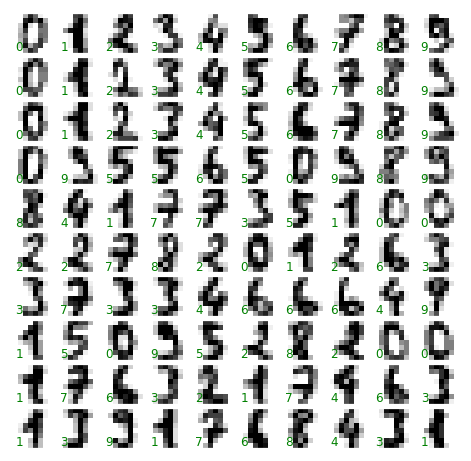

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* and transform the data to two dimensions:

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

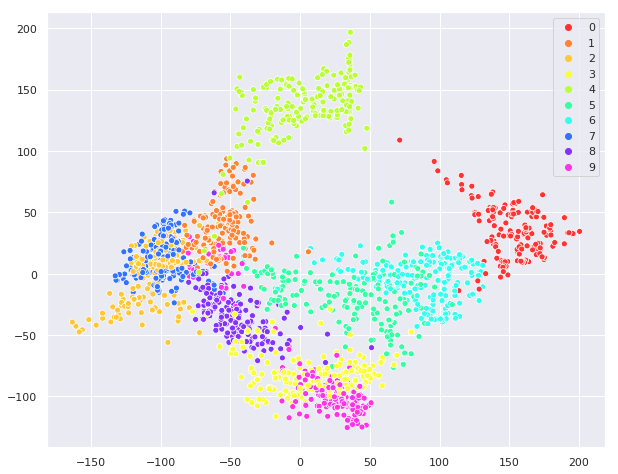

In [8]:
pkmn_type_colors = ['#FF3333', '#FF8333', '#FFC733', '#F9FF33', '#B8FF33', '#33FFA5', '#33FFF0', '#3371FF', '#8333FF', '#FF33E6']
sns.scatterplot(x=data_projected[:, 0], y=data_projected[:, 1], hue=digits.target, palette=pkmn_type_colors);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in red) and ones (in orange) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=833)

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8577777777777778

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

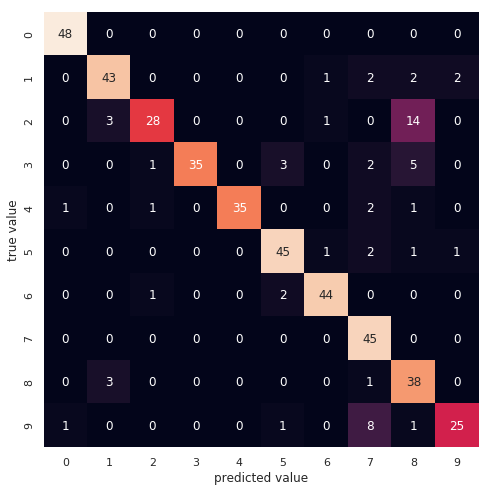

In [12]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

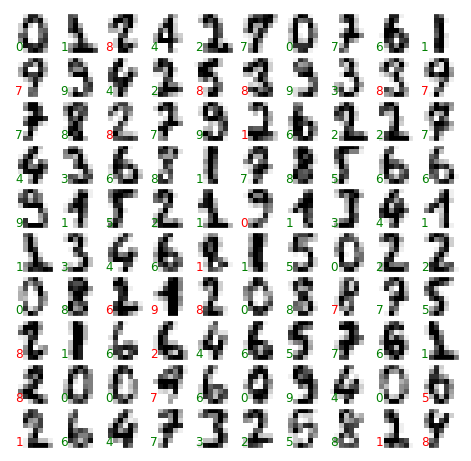

In [13]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as convolutional neural networks (CNN), random forests or another classification approach.